# Data Preprocessing and Undersampling

This notebook demonstrates the process of reading a CSV file, preprocessing its headers, filtering the data, and applying undersampling to balance the dataset. This is particularly useful in machine learning tasks where class imbalance could bias the model training.

## Features:
- Preprocess CSV headers to remove unwanted characters.
- Read the CSV data into a pandas DataFrame.
- Filter the data by removing specific columns and rows with missing values.
- Apply undersampling to balance the dataset.
- Visualize the distribution of classes before and after undersampling.
- Save the processed data to a new CSV file.

## Setup and Imports

Before running this notebook, ensure you have installed the necessary Python packages required for your specific environment.

In [1]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Configuration

Specify the path to the CSV file and other relevant settings here.


In [2]:
CSV_FILENAME = 'testingthis.csv'  # Adjust the path to your CSV file

## Preprocessing Function

Define a function to preprocess the CSV headers, particularly to clean up the 4th column header.

In [3]:
def preprocess_header(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        headers = file.readline().strip().split(',')
        
    if len(headers) >= 4:
        headers[3] = headers[3].replace('\r', '')
    return headers

## Data Loading and Preprocessing

Load the CSV data with the corrected headers and perform initial data filtering.

In [4]:
headers = preprocess_header(CSV_FILENAME)
csv_data = pd.read_csv(CSV_FILENAME, lineterminator='\n', header=None, skiprows=1, names=headers)
csv_data = csv_data.drop(columns=['submission_name', 'submission_text'])
csv_data = csv_data[pd.to_numeric(csv_data['label'], errors='coerce').notnull()]

## Undersampling

Apply undersampling to balance the dataset, focusing on the distribution of the 'label' column.

In [5]:
sampler = RandomUnderSampler(random_state=42)
X = csv_data.iloc[:, 0].values.reshape(-1, 1)
y = csv_data.iloc[:, 1]

X_resampled, y_resampled = sampler.fit_resample(X, y)
resampled_data = pd.DataFrame(list(zip(X_resampled.flatten(), y_resampled)), columns=['text', 'label'])

## Save Processed Data

Save the undersampled dataset to a new CSV file.

In [6]:
final_filename = CSV_FILENAME.replace('.csv', '-final.csv')
resampled_data.to_csv(final_filename, index=False)
print(f"Processed data saved to {final_filename}")

Processed data saved to testingthis-final.csv


## Visualization

Visualize the class distribution before and after undersampling to understand the effect.


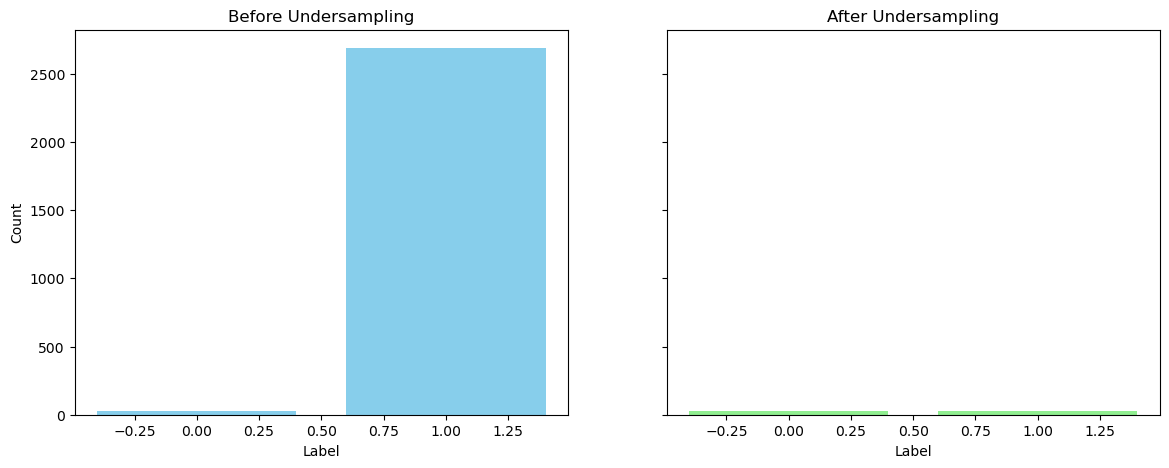

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Before undersampling
axs[0].bar(csv_data['label'].value_counts().index, csv_data['label'].value_counts().values, color='skyblue')
axs[0].set_title('Before Undersampling')
axs[0].set_xlabel('Label')
axs[0].set_ylabel('Count')

# After undersampling
axs[1].bar(resampled_data['label'].value_counts().index, resampled_data['label'].value_counts().values, color='lightgreen')
axs[1].set_title('After Undersampling')
axs[1].set_xlabel('Label')

plt.show()